In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import minimize

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [ ]:
def f(x, y):
    return (4-2.1*x**2+x**4/3)*x**2+x*y+(4*y**2-4)*y**2



2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

Time offset for maxT: 6.74+-0.08
Time offset for minT: 7.16+-0.05

 Compability between the two: 4.6 => they are not the same within the fit accuracy


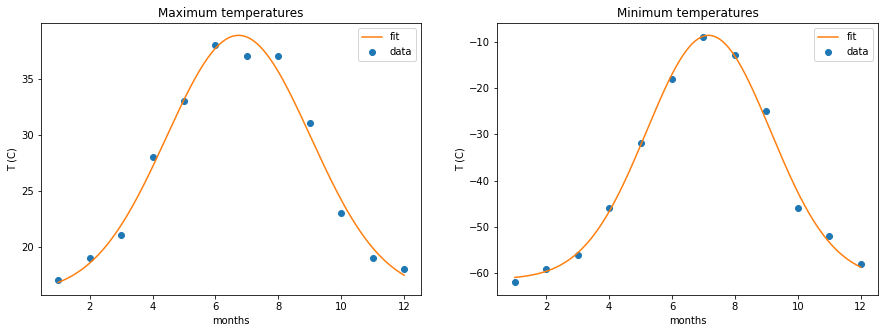

In [4]:
months = [i for i in range(1,13)]
maxT = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
minT = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

# Plot these temperature extremes
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].scatter(months, maxT, label="data")
axes[0].set_title("Maximum temperatures")
axes[0].set_xlabel("months")
axes[0].set_ylabel("T (C)")

axes[1].scatter(months, minT, label="data")
axes[1].set_title("Minimum temperatures")
axes[1].set_xlabel("months")
axes[1].set_ylabel("T (C)")

# Define a function that can describe min and max temperatures
def gaussian(x, A, mu, std, c):
    return A*np.exp(-(x-mu)**2/(2*std**2))+c

# Fit this function to the data with scipy.optimize.curve_fit()
p0_M = [40, 7, 4, 0]
popt_M, pcov_M= curve_fit(gaussian, months, maxT, p0_M)

p0_m = [50, 7, 4, -60]
popt_m, pcov_m= curve_fit(gaussian, months, minT, p0_m)

# Plot the result
x = np.linspace(1, 12, 1000)

axes[0].plot(x, gaussian(x, *popt_M), c="tab:orange", label="fit")
axes[0].legend()
axes[1].plot(x, gaussian(x, *popt_m), c="tab:orange", label="fit")
axes[1].legend()

# Is the time offset for min and max temperatures the same within the fit accuracy?
print("Time offset for maxT: %4.2f+-%4.2f"%(popt_M[1], np.sqrt(pcov_M[1,1])))
print("Time offset for minT: %4.2f+-%4.2f"%(popt_m[1], np.sqrt(pcov_m[1,1])))
comp = abs(popt_M[1]-popt_m[1])/np.sqrt(pcov_m[1,1]+pcov_M[1,1])
print("\n Compability between the two: %3.1f => they are not the same within the fit accuracy"%(comp))



3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.